In [1]:
"""
데이터의 분포가 불균형 할 때, KNN은 거리를 계산하는 머신러닝 알고리즘 이기에
길쭉한 형태의 데이터 분포는 좋지 않다.
따라서 데이터 표준화 작업을 해줘야 한다.
표준화 방법에는 2가지가 있다.
1. StandardScaler (z-score normalization)
2. MinMaxScaler

적용 순서는
데이터 읽음 -> 표준화 -> train/test set split -> 학습 -> 평가
"""

'\n데이터의 분포가 불균형 할 때, KNN은 거리를 계산하는 머신러닝 알고리즘 이기에\n길쭉한 형태의 데이터 분포는 좋지 않다.\n따라서 데이터 표준화 작업을 해줘야 한다.\n표준화 방법에는 2가지가 있다.\n1. StandardScaler (z-score normalization)\n2. MinMaxScaler\n\n적용 순서는\n데이터 읽음 -> 표준화 -> train/test set split -> 학습 -> 평가\n'

In [1]:
#패키지 불러오기 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
cancer=load_breast_cancer()
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
# scaler 초기화 및 적용
scaler_mm = MinMaxScaler()
scaler_ss = StandardScaler()

z_mm = scaler_mm.fit_transform(cancer['data'])
z_ss = scaler_ss.fit_transform(cancer['data'])

In [11]:
# Train / Test 데이터 세트 분할
# train_test_split은 랜덤하게 데이터를 섞은 후 split 한다.
trainX, testX, trainY, testY = train_test_split(z_ss, cancer['target'], test_size = 0.2)

# KNN 으로 Train 데이터 세트를 학습한다.
# n_neighbors = k 군집 개수, p = minkowski의 m 을 의미 1 : 유클리디안 거리 / 2 : 

knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
knn.fit(trainX,trainY)

KNeighborsClassifier(n_neighbors=10)

In [12]:
# Test 세트와 Feature에 대한 class를 추정하고, 정확도를 계산한다
# accuracy = knn.score(testX, testY) 동일
predY = knn.predict(testX) # 테스트 데이터 예측값
accuracy = (testY == predY).mean() # 정확도

print("* 시험용 데이터로 측정확 정확도 = %.2f"%accuracy)

* 시험용 데이터로 측정확 정확도 = 0.98


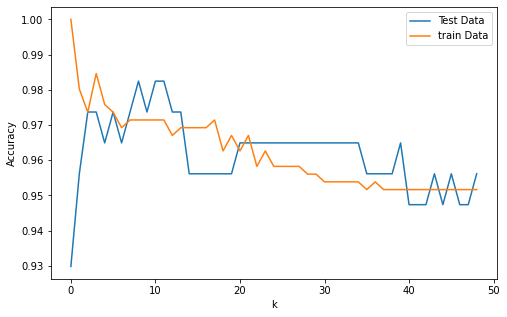

In [10]:
# k갑을 변경해 가면서 정확도를 측정해 본다.
testAcc = []
trainAcc = []

for k in range(1,50):
    # knn 으로 Train 데이터 세드 학습
    knn = KNeighborsClassifier(n_neighbors = k , p = 2, metric='minkowski')
    knn.fit(trainX, trainY)
    
    # Test 데이터 세트의 Feature에 대한 정확도
    predY = knn.predict(testX)
    testAcc.append((testY == predY).sum() / len(predY))
    
    # Train 데이터 세트의 Feature에 대한 정확도
    predY = knn.predict(trainX)
    trainAcc.append((trainY == predY).sum() / len(predY))
    
plt.figure(figsize=(8,5))
plt.plot(testAcc, label = "Test Data")
plt.plot(trainAcc, label = "train Data")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()